In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

df = pd.read_csv("Thecleverprogrammer.csv")
df.head()

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973


In [3]:
df.shape

(391, 2)

In [4]:
df.isnull().sum()

Date     0
Views    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    391 non-null    object
 1   Views   391 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


In [9]:
df['Date']=pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB


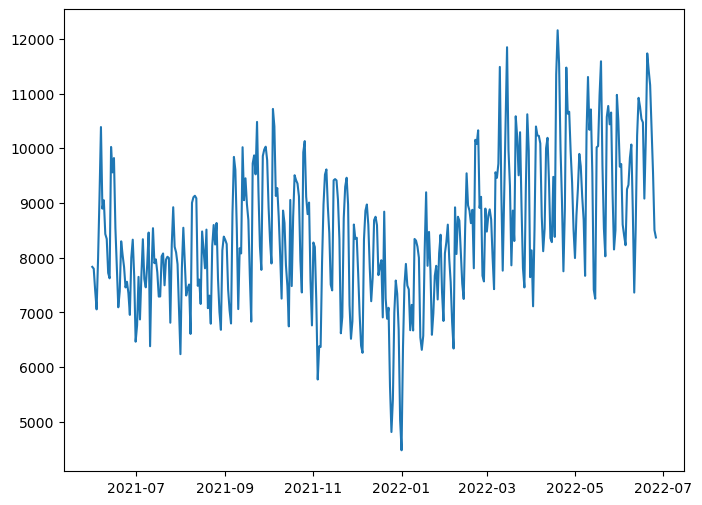

In [11]:
plt.figure(figsize=(8,6))
plt.plot(df['Date'],df['Views'])

<Figure size 640x480 with 0 Axes>

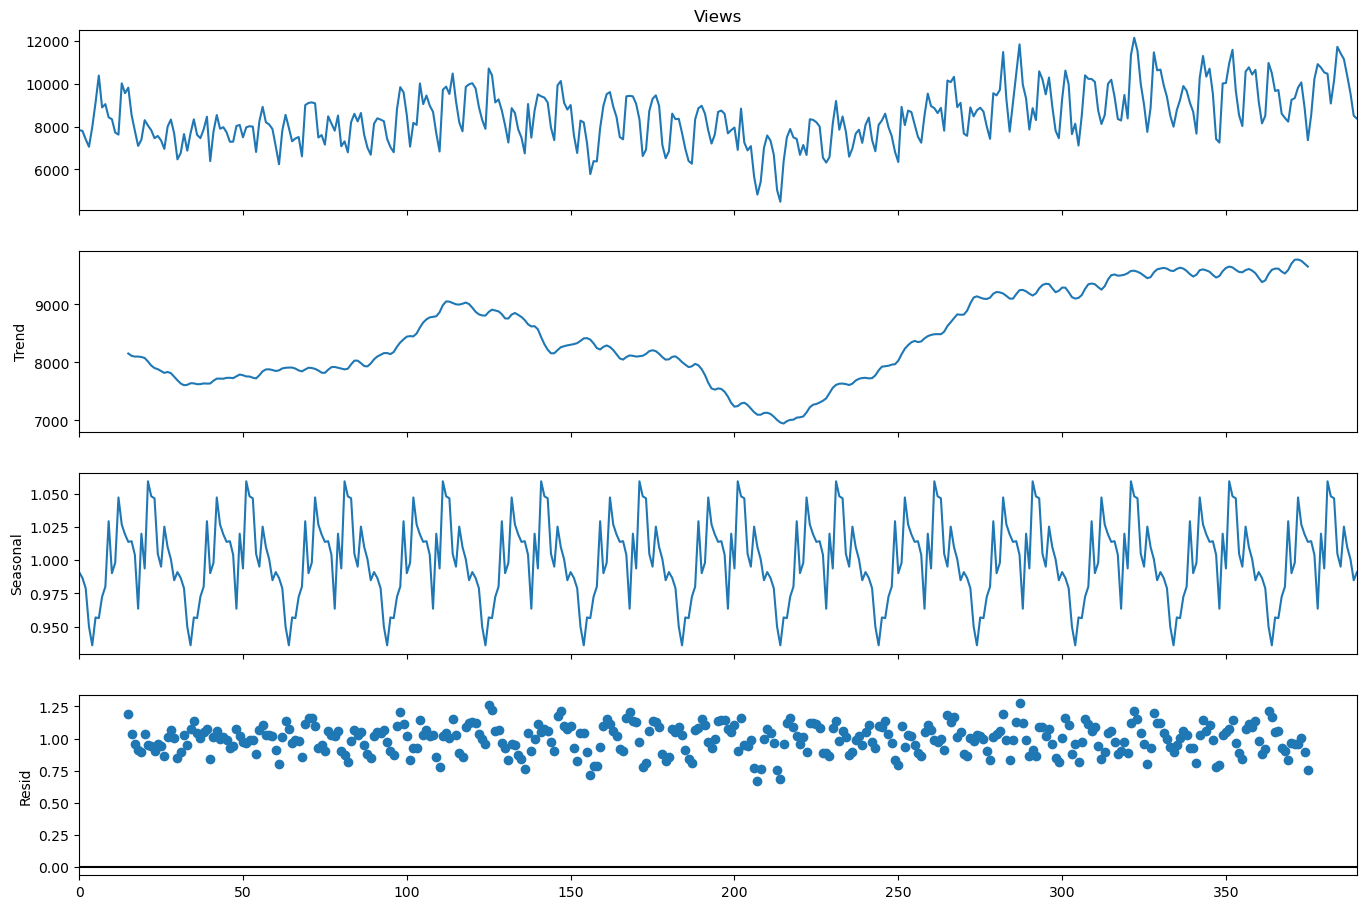

In [15]:
result = seasonal_decompose(df['Views'], model='multiplicative', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,10)



<Axes: xlabel='Lag', ylabel='Autocorrelation'>

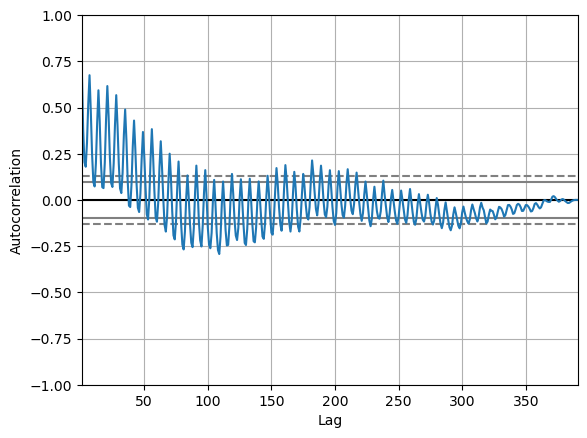

In [23]:
pd.plotting.autocorrelation_plot(df["Views"])

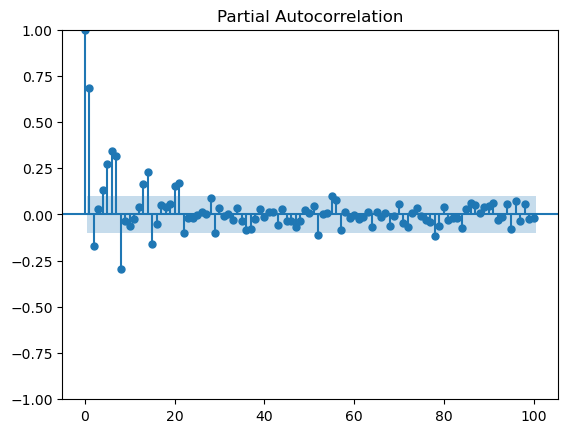

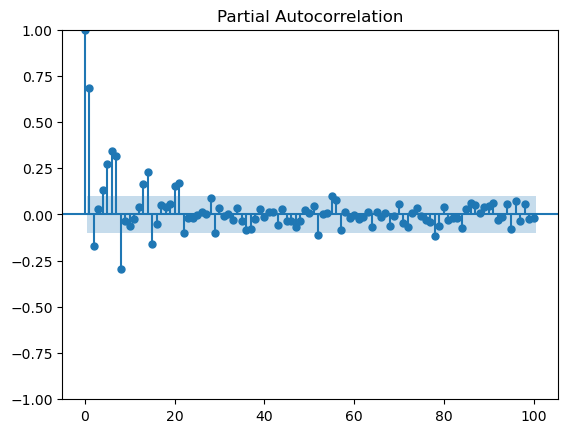

In [22]:
plot_pacf(df["Views"], lags = 100)

In [24]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(df['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
model.summary()

C:\Users\PAVI\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\PAVI\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.505
Date:                            Mon, 19 Feb 2024   AIC                           6229.009
Time:                                    12:34:39   BIC                           6288.033
Sample:                                         0   HQIC                          6252.435
                                            - 391                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7605      0.132      5.767      0.000       0.502       1.019
ar.L2         -0.7553      0.134     -5.642      0.000      -1.018      -0.493
ar.L3         -0.1998      0.167     -1.194      0.232      -0.528       0.128
ar.L4         -0.1495      0.151     -0.992      0.321      -0.445       0.146
ar.L5         -0.1686      0.137     -1.228      0.220      -0.438       0.101
ma.L1         -1.1766      0.092    -12.734      0.000      -1.358      -0.995
ma.L2          0.8878      0.077     11.556      0.000       0.737       1.038
ar.S.L12      -0.2425      3.827     -0.063      0.949      -7.743       7.258
ar.S.L24       0.0650      0.595      0.109      0.913      -1.101       1.231
ar.S.L36      -0.1763      0.270     -0.654      0.513      -0.705       0.352
ar.S.L48      -0.1969      0.776     -0.254      0.800      -1.718       1.324
ar.S.L60       0.0213      0.772      0.028      0.978      -1.493       1.535
ma.S.L12      -0.6948      3.831     -0.181      0.856      -8.203       6.814
ma.S.L24      -0.1047      3.038     -0.034      0.973      -6.060       5.850
sigma2      1.257e+06   1.59e+05      7.911      0.000    9.45e+05    1.57e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 1.36
Prob(Q):                              0.86   Prob(JB):                         0.51
Heteroskedasticity (H):               1.04   Skew:                             0.15
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.37e+14. Standard errors may be unstable.
"""

In [25]:
predictions = model.predict(len(df), len(df)+50)
print(predictions)

391     9865.991287
392    10783.110913
393    10780.311809
394     9865.607200
395     8748.852344
396     8210.221688
397     8932.495008
398     9696.777425
399    10281.630854
400    10644.570451
401     9887.762781
402     9347.134490
403     9002.692452
404     9078.111338
405    10537.889681
406    11010.604189
407    10934.050666
408    10122.940555
409     9440.819338
410     8617.684599
411     9178.486137
412    10379.689365
413    10617.367810
414    10795.594935
415    10253.297702
416     9430.195508
417     9002.035275
418     9139.645385
419     9883.275882
420    10250.218818
421    10740.696723
422     9911.608343
423     9506.449517
424     9017.067565
425     8826.388184
426    10142.475960
427    10860.252653
428    10926.670683
429    10418.218284
430     9434.393640
431     8691.690857
432     8742.267660
433    10077.980579
434    10540.059221
435    10864.082521
436    10477.248840
437     9322.066816
438     9140.184746
439     9342.934782
440    10299.096947


<Axes: >

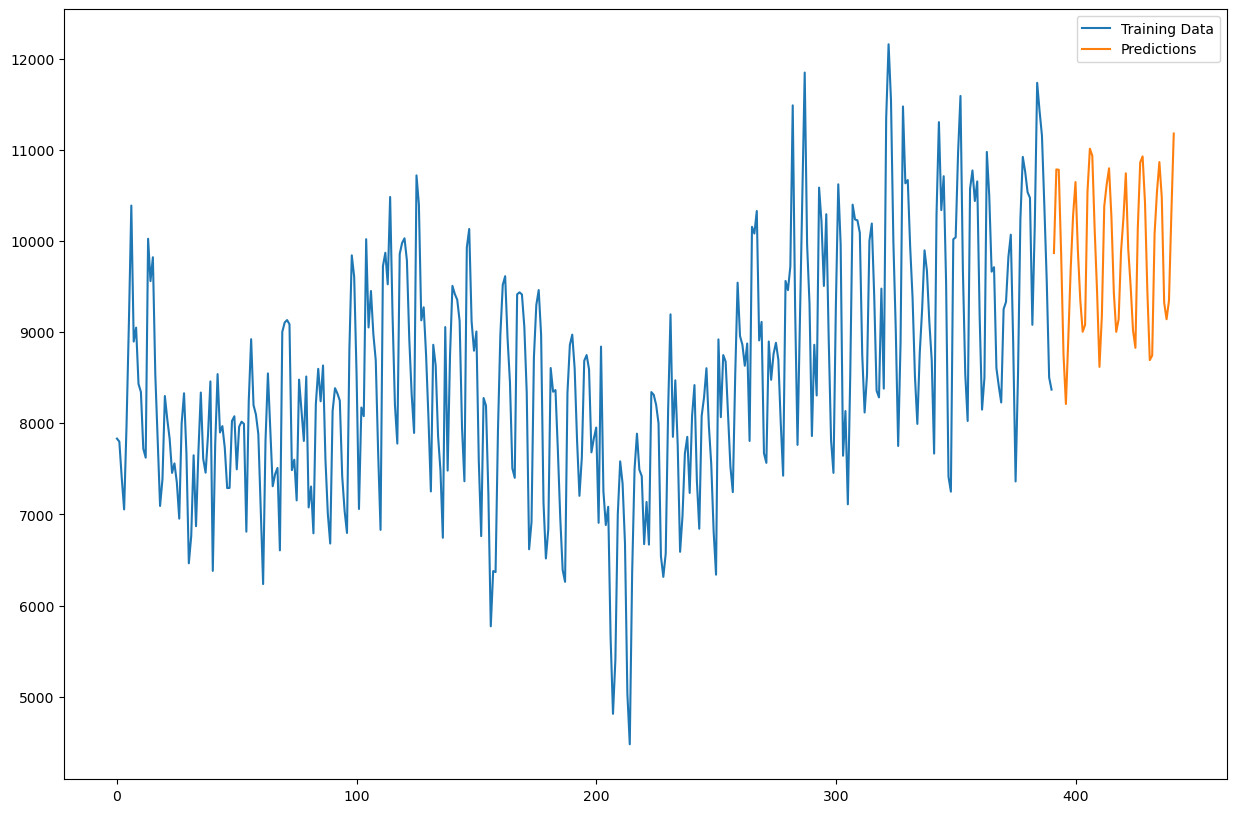

In [26]:
df["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")